In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns

from matplotlib import font_manager, rc

font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)

%matplotlib inline

유무임 통계자료


In [6]:
df3 = pd.read_excel('dataset/2020년_07월_교통카드_유무임통계자료.xlsx', thousands = ',')
df3

,사용월,호선명,역ID,지하철역,유임승차,유임하차,무임승차,무임하차
0,2020-07,1호선,1,서울역,1050692,1009246,170236,160113
1,2020-07,1호선,10,동묘앞,126100,135446,132170,134894
2,2020-07,1호선,2,시청,491470,507259,67640,66567
3,2020-07,1호선,3,종각,915920,905687,126653,119811
4,2020-07,1호선,4,종로3가,496094,465884,283227,267518
...,...,...,...,...,...,...,...,...
593,2020-07,우이신설선,699,북한산보국문,124175,112931,35280,36035
594,2020-07,우이신설선,700,정릉,81541,72718,40089,37763
595,2020-07,우이신설선,701,성신여대입구(돈암),61413,74532,25499,24984
596,2020-07,우이신설선,702,보문,27950,28102,13482,13832


사용할 열만 택해서 다시 만듬

In [8]:
df3 = df3[['호선명', '지하철역', '유임승차', '유임하차', '무임승차', '무임하차']]
df3

,호선명,지하철역,유임승차,유임하차,무임승차,무임하차
0,1호선,서울역,1050692,1009246,170236,160113
1,1호선,동묘앞,126100,135446,132170,134894
2,1호선,시청,491470,507259,67640,66567
3,1호선,종각,915920,905687,126653,119811
4,1호선,종로3가,496094,465884,283227,267518
...,...,...,...,...,...,...
593,우이신설선,북한산보국문,124175,112931,35280,36035
594,우이신설선,정릉,81541,72718,40089,37763
595,우이신설선,성신여대입구(돈암),61413,74532,25499,24984
596,우이신설선,보문,27950,28102,13482,13832


각 라인의 평균값을 알아보자

In [36]:
linedf = df3['무임승차'].groupby(df3['호선명'])
linedf_mean = linedf.mean()
linedf_mean = linedf_mean.astype(int)
linedf_mean_up = linedf_mean.sort_values(ascending=False)
linedf_mean_up.head(9)


호선명
1호선    172600
4호선     88160
2호선     83686
경인선     72789
3호선     66686
일산선     57366
7호선     52750
8호선     50758
5호선     50465
Name: 무임승차, dtype: int32

# 1호선

In [61]:

dff1 = df3.loc[data3['호선명'] == '1호선']
dff11 = dff1.sort_values(by='무임승차', ascending=False)
dff11

,사용월,호선명,역ID,지하철역,유임승차,유임하차,무임승차,무임하차
4,2020-07,1호선,4,종로3가,496094,465884,283227,267518
9,2020-07,1호선,9,청량리(서울시립대입구),341513,333804,250749,255787
5,2020-07,1호선,5,종로5가,385593,403254,240595,231238
8,2020-07,1호선,8,제기동,229605,222925,235194,252505
0,2020-07,1호선,1,서울역,1050692,1009246,170236,160113
1,2020-07,1호선,10,동묘앞,126100,135446,132170,134894
3,2020-07,1호선,3,종각,915920,905687,126653,119811
6,2020-07,1호선,6,동대문,221485,229774,111363,114765
7,2020-07,1호선,7,신설동,286150,286122,108173,103904
2,2020-07,1호선,2,시청,491470,507259,67640,66567


In [38]:
dfmean1 = dff1['무임승차'].mean()
dfmean11 = dff11[(dff11['무임승차'] > dfmean1)]
dfmean11['지하철역'] = dfmean11['지하철역'].replace(['청량리(서울시립대입구)'],'청량리')
dfmean11


<ipython-input-38-6a118c421a83>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfmean11['지하철역'] = dfmean11['지하철역'].replace(['청량리(서울시립대입구)'],'청량리')


,사용월,호선명,역ID,지하철역,유임승차,유임하차,무임승차,무임하차
4,2020-07,1호선,4,종로3가,496094,465884,283227,267518
9,2020-07,1호선,9,청량리,341513,333804,250749,255787
5,2020-07,1호선,5,종로5가,385593,403254,240595,231238
8,2020-07,1호선,8,제기동,229605,222925,235194,252505


(array([0, 1, 2, 3]),
 [Text(0, 0, '종로3가'),
  Text(1, 0, '청량리'),
  Text(2, 0, '종로5가'),
  Text(3, 0, '제기동')])

<Figure size 2880x2160 with 0 Axes>

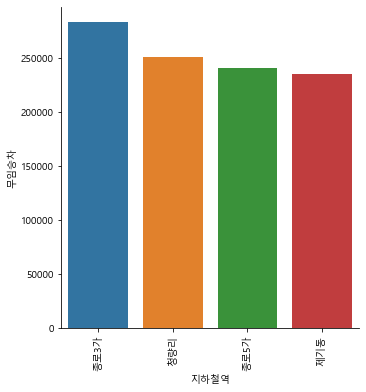

In [39]:
plt.figure(figsize=(40,30))
plt.rcParams['lines.linewidth'] = 4
pp1 = sns.catplot(x='지하철역', y='무임승차', data=dfmean11, kind='bar');
pp1
plt.xticks(rotation=90)

# 2호선


In [40]:
dff2 = df3.loc[data3['호선명'] == '2호선']
dff22 = dff2.sort_values(by='무임승차', ascending=False)
dff22

,사용월,호선명,역ID,지하철역,유임승차,유임하차,무임승차,무임하차
29,2020-07,2호선,30,선릉,1316056,1178503,193819,172446
39,2020-07,2호선,40,신림,1607404,1531241,190252,192709
43,2020-07,2호선,44,신도림,1267057,1258159,170396,161262
37,2020-07,2호선,38,서울대입구(관악구청),1222845,1185550,163039,155596
25,2020-07,2호선,26,잠실(송파구청),1755755,1741395,158001,152177
35,2020-07,2호선,36,사당,922971,1046707,156467,151658
31,2020-07,2호선,32,강남,2402912,2460256,156106,138149
41,2020-07,2호선,42,구로디지털단지,1528559,1520866,142769,144492
32,2020-07,2호선,33,교대(법원.검찰청),807591,915034,138178,154787
30,2020-07,2호선,31,역삼,1183290,1334011,137905,139474


In [41]:
dfmean2 = dff2['무임승차'].mean()
dfmean22 = dff22[(dff22['무임승차'] > dfmean2)]
dfmean22 = dfmean22[(dfmean22['무임승차'] > 100000)]
dfmean22['지하철역'] = dfmean22['지하철역'].replace(['서울대입구(관악구청)'],'서울대입구')
dfmean22['지하철역'] = dfmean22['지하철역'].replace(['잠실(송파구청)'],'잠실')
dfmean22['지하철역'] = dfmean22['지하철역'].replace(['구로디지털단지'],'구로디지털')
dfmean22['지하철역'] = dfmean22['지하철역'].replace(['교대(법원.검찰청)'],'교대')
dfmean22['지하철역'] = dfmean22['지하철역'].replace(['대림(구로구청)'],'교대')
dfmean22

,사용월,호선명,역ID,지하철역,유임승차,유임하차,무임승차,무임하차
29,2020-07,2호선,30,선릉,1316056,1178503,193819,172446
39,2020-07,2호선,40,신림,1607404,1531241,190252,192709
43,2020-07,2호선,44,신도림,1267057,1258159,170396,161262
37,2020-07,2호선,38,서울대입구,1222845,1185550,163039,155596
25,2020-07,2호선,26,잠실,1755755,1741395,158001,152177
35,2020-07,2호선,36,사당,922971,1046707,156467,151658
31,2020-07,2호선,32,강남,2402912,2460256,156106,138149
41,2020-07,2호선,42,구로디지털,1528559,1520866,142769,144492
32,2020-07,2호선,33,교대,807591,915034,138178,154787
30,2020-07,2호선,31,역삼,1183290,1334011,137905,139474


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 [Text(0, 0, '선릉'),
  Text(1, 0, '신림'),
  Text(2, 0, '신도림'),
  Text(3, 0, '서울대입구'),
  Text(4, 0, '잠실'),
  Text(5, 0, '사당'),
  Text(6, 0, '강남'),
  Text(7, 0, '구로디지털'),
  Text(8, 0, '교대'),
  Text(9, 0, '역삼'),
  Text(10, 0, '봉천'),
  Text(11, 0, '신촌'),
  Text(12, 0, '신대방'),
  Text(13, 0, '강변(동서울터미널)'),
  Text(14, 0, '삼성(무역센터)')])

<Figure size 1080x864 with 0 Axes>

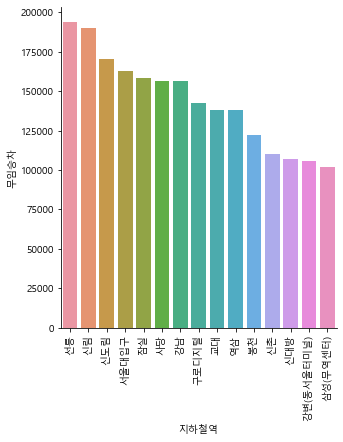

In [42]:
plt.figure(figsize=(15,12))
plt.rcParams['lines.linewidth'] = 4
pp2 = sns.catplot(x='지하철역', y='무임승차', data=dfmean22, kind='bar');
pp2
plt.xticks(rotation=90)

# 3호선

In [43]:
dff3 = df3.loc[data3['호선명'] == '3호선']
dff33 = dff3.sort_values(by='무임승차', ascending=False)
dff33

,사용월,호선명,역ID,지하철역,유임승차,유임하차,무임승차,무임하차
62,2020-07,3호선,63,연신내,858013,796213,230051,221508
80,2020-07,3호선,81,고속터미널,1124153,1113763,143264,136545
83,2020-07,3호선,84,양재(서초구청),908486,997997,128820,129809
65,2020-07,3호선,66,홍제,363696,335089,123867,122576
63,2020-07,3호선,64,불광,341401,364469,116507,128954
77,2020-07,3호선,78,압구정,766312,838561,111665,109059
61,2020-07,3호선,62,구파발,494637,468886,102106,97804
82,2020-07,3호선,83,남부터미널(예술의전당),731902,754445,99262,100480
90,2020-07,3호선,91,수서,385807,392246,90146,88690
74,2020-07,3호선,75,약수,294465,288980,72259,69315


In [44]:
dff33 = dff33.query('지하철역 !="충무로"')
dff33

,사용월,호선명,역ID,지하철역,유임승차,유임하차,무임승차,무임하차
62,2020-07,3호선,63,연신내,858013,796213,230051,221508
80,2020-07,3호선,81,고속터미널,1124153,1113763,143264,136545
83,2020-07,3호선,84,양재(서초구청),908486,997997,128820,129809
65,2020-07,3호선,66,홍제,363696,335089,123867,122576
63,2020-07,3호선,64,불광,341401,364469,116507,128954
77,2020-07,3호선,78,압구정,766312,838561,111665,109059
61,2020-07,3호선,62,구파발,494637,468886,102106,97804
82,2020-07,3호선,83,남부터미널(예술의전당),731902,754445,99262,100480
90,2020-07,3호선,91,수서,385807,392246,90146,88690
74,2020-07,3호선,75,약수,294465,288980,72259,69315


In [45]:
dfmean3 = dff33['무임승차'].mean()
dfmean33 = dff33[(dff33['무임승차'] > dfmean3)]
dfmean33['지하철역'] = dfmean33['지하철역'].replace(['양재(서초구청)'],'양재')
dfmean33['지하철역'] = dfmean33['지하철역'].replace(['남부터미널(예술의전당)'],'남부터미널')
dfmean33

<ipython-input-45-d09c210db713>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfmean33['지하철역'] = dfmean33['지하철역'].replace(['양재(서초구청)'],'양재')
<ipython-input-45-d09c210db713>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfmean33['지하철역'] = dfmean33['지하철역'].replace(['남부터미널(예술의전당)'],'남부터미널')


,사용월,호선명,역ID,지하철역,유임승차,유임하차,무임승차,무임하차
62,2020-07,3호선,63,연신내,858013,796213,230051,221508
80,2020-07,3호선,81,고속터미널,1124153,1113763,143264,136545
83,2020-07,3호선,84,양재,908486,997997,128820,129809
65,2020-07,3호선,66,홍제,363696,335089,123867,122576
63,2020-07,3호선,64,불광,341401,364469,116507,128954
77,2020-07,3호선,78,압구정,766312,838561,111665,109059
61,2020-07,3호선,62,구파발,494637,468886,102106,97804
82,2020-07,3호선,83,남부터미널,731902,754445,99262,100480
90,2020-07,3호선,91,수서,385807,392246,90146,88690
74,2020-07,3호선,75,약수,294465,288980,72259,69315


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, '연신내'),
  Text(1, 0, '고속터미널'),
  Text(2, 0, '양재'),
  Text(3, 0, '홍제'),
  Text(4, 0, '불광'),
  Text(5, 0, '압구정'),
  Text(6, 0, '구파발'),
  Text(7, 0, '남부터미널'),
  Text(8, 0, '수서'),
  Text(9, 0, '약수')])

<Figure size 1080x864 with 0 Axes>

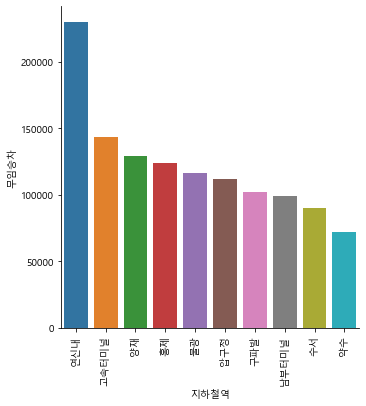

In [46]:
plt.figure(figsize=(15,12))
plt.rcParams['lines.linewidth'] = 4
pp3 = sns.catplot(x='지하철역', y='무임승차', data=dfmean33, kind='bar');
pp3
plt.xticks(rotation=90)

# 4호선


In [47]:
dff4 = df3.loc[data3['호선명'] == '4호선']
dff4

,사용월,호선명,역ID,지하철역,유임승차,유임하차,무임승차,무임하차
94,2020-07,4호선,100,수유(강북구청),792970,778651,175440,174303
95,2020-07,4호선,101,미아(서울사이버대학),333019,306883,100118,101505
96,2020-07,4호선,102,미아사거리,643781,617486,161647,160966
97,2020-07,4호선,103,길음,469022,440734,96642,96496
98,2020-07,4호선,104,성신여대입구(돈암),496555,476680,75848,73740
99,2020-07,4호선,105,한성대입구(삼선교),318782,308007,62777,61791
100,2020-07,4호선,106,혜화,780616,809504,111363,109399
101,2020-07,4호선,107,동대문,443027,458027,141636,133243
102,2020-07,4호선,108,동대문역사문화공원(DDP),366432,342801,50062,44756
103,2020-07,4호선,109,충무로,585434,615439,104666,105167


In [48]:
dfmean4 = dff4['무임승차'].mean()
dfmean44 = dff4[(dff4['무임승차'] > dfmean4)]
dfmean44 = dfmean44[(dfmean44['무임승차'] > 100000)]
dfmean44['지하철역'] = dfmean44['지하철역'].replace(['수유(강북구청)'],'수유')
dfmean44['지하철역'] = dfmean44['지하철역'].replace(['회현(남대문시장)'],'회현')
dfmean44['지하철역'] = dfmean44['지하철역'].replace(['총신대입구(이수)'],'총신대입구')
dfmean44 = dfmean44.sort_values(by='무임승차', ascending=False)
dfmean44 

,사용월,호선명,역ID,지하철역,유임승차,유임하차,무임승차,무임하차
118,2020-07,4호선,98,창동,581811,617495,182609,189986
94,2020-07,4호선,100,수유,792970,778651,175440,174303
105,2020-07,4호선,111,회현,473191,510832,164421,164305
96,2020-07,4호선,102,미아사거리,643781,617486,161647,160966
101,2020-07,4호선,107,동대문,443027,458027,141636,133243
119,2020-07,4호선,99,쌍문,705302,614557,139353,137057
112,2020-07,4호선,118,총신대입구,416954,461630,128297,134740
100,2020-07,4호선,106,혜화,780616,809504,111363,109399
103,2020-07,4호선,109,충무로,585434,615439,104666,105167
116,2020-07,4호선,96,상계,444848,397002,103625,101389


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 [Text(0, 0, '창동'),
  Text(1, 0, '수유'),
  Text(2, 0, '회현'),
  Text(3, 0, '미아사거리'),
  Text(4, 0, '동대문'),
  Text(5, 0, '쌍문'),
  Text(6, 0, '총신대입구'),
  Text(7, 0, '혜화'),
  Text(8, 0, '충무로'),
  Text(9, 0, '상계'),
  Text(10, 0, '미아(서울사이버대학)')])

<Figure size 1080x864 with 0 Axes>

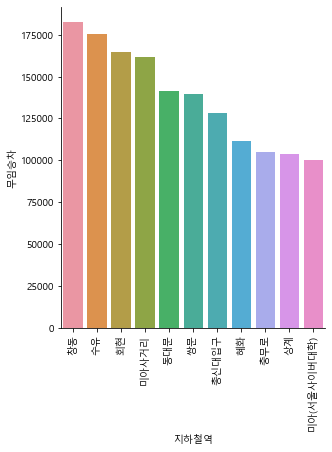

In [49]:
plt.figure(figsize=(15,12))
plt.rcParams['lines.linewidth'] = 4
pp4 = sns.catplot(x='지하철역', y='무임승차', data=dfmean44, kind='bar');
pp4
plt.xticks(rotation=90)

In [50]:
dff5 = df3.loc[data3['호선명'] == '5호선']
dff5

,사용월,호선명,역ID,지하철역,유임승차,유임하차,무임승차,무임하차
375,2020-07,5호선,380,방화,148839,139689,44088,42344
376,2020-07,5호선,381,개화산,111965,104945,31272,31135
377,2020-07,5호선,382,김포공항,167573,161032,25386,27805
378,2020-07,5호선,383,송정,145168,133276,44282,42541
379,2020-07,5호선,384,마곡,197628,188815,30702,29405
380,2020-07,5호선,385,발산,433749,455778,73474,70999
381,2020-07,5호선,386,우장산,324897,312154,74327,77258
382,2020-07,5호선,387,화곡,662991,603489,123095,117169
383,2020-07,5호선,388,까치산,677684,628657,134815,135753
384,2020-07,5호선,389,신정(은행정),331250,248177,52317,49990


In [51]:
dfmean5 = dff5['무임승차'].mean()
dfmean55 = dff5[(dff5['무임승차'] > dfmean5)]
dfmean55 = dfmean55[(dfmean55['무임승차'] > 100000)]
dfmean55['지하철역'] = dfmean55['지하철역'].replace(['천호(풍납토성)'],'천호')
dfmean55 = dfmean55.sort_values(by='무임승차', ascending=False)
dfmean55 

,사용월,호선명,역ID,지하철역,유임승차,유임하차,무임승차,무임하차
383,2020-07,5호선,388,까치산,677684,628657,134815,135753
382,2020-07,5호선,387,화곡,662991,603489,123095,117169
412,2020-07,5호선,417,천호,402955,421420,106289,114199


(array([0, 1, 2]), [Text(0, 0, '까치산'), Text(1, 0, '화곡'), Text(2, 0, '천호')])

<Figure size 1080x864 with 0 Axes>

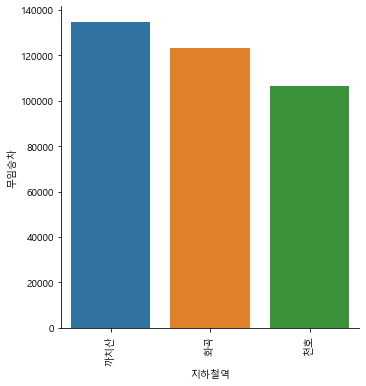

In [52]:
plt.figure(figsize=(15,12))
plt.rcParams['lines.linewidth'] = 4
pp5 = sns.catplot(x='지하철역', y='무임승차', data=dfmean55, kind='bar');
pp5
plt.xticks(rotation=90)

# 1,2,3,4,5호선 합친 테이블

In [53]:
pp10 = pd.concat([dfmean11, dfmean22, dfmean33, dfmean44, dfmean55], axis=0)
pp10

,사용월,호선명,역ID,지하철역,유임승차,유임하차,무임승차,무임하차
4,2020-07,1호선,4,종로3가,496094,465884,283227,267518
9,2020-07,1호선,9,청량리,341513,333804,250749,255787
5,2020-07,1호선,5,종로5가,385593,403254,240595,231238
8,2020-07,1호선,8,제기동,229605,222925,235194,252505
29,2020-07,2호선,30,선릉,1316056,1178503,193819,172446
39,2020-07,2호선,40,신림,1607404,1531241,190252,192709
43,2020-07,2호선,44,신도림,1267057,1258159,170396,161262
37,2020-07,2호선,38,서울대입구,1222845,1185550,163039,155596
25,2020-07,2호선,26,잠실,1755755,1741395,158001,152177
35,2020-07,2호선,36,사당,922971,1046707,156467,151658


In [30]:
pp10 = pp10.sort_values(by='무임승차', ascending=False)
pp10

,사용월,호선명,역ID,지하철역,유임승차,유임하차,무임승차,무임하차,작업일시
4,2021-06,1호선,4,종로3가,427162,383856,257671,241239,2021-07-03 11:17:45
5,2021-06,1호선,5,종로5가,358583,366760,239486,230509,2021-07-03 11:17:45
9,2021-06,1호선,9,청량리,317436,314995,236089,240160,2021-07-03 11:17:45
8,2021-06,1호선,8,제기동,224878,218527,234585,252064,2021-07-03 11:17:45
62,2021-06,3호선,63,연신내,786054,732219,228275,221571,2021-07-03 11:17:45
39,2021-06,2호선,40,신림,1505230,1450980,193182,195721,2021-07-03 11:17:45
29,2021-06,2호선,30,선릉,1204673,1074191,189758,169124,2021-07-03 11:17:45
43,2021-06,2호선,44,신도림,1160242,1149293,168261,159929,2021-07-03 11:17:45
0,2021-06,1호선,1,서울역,981045,929270,167818,158386,2021-07-03 11:17:45
94,2021-06,4호선,100,수유,748551,737501,166529,165763,2021-07-03 11:17:45


In [56]:
pp101 = pp10['무임승차'].mean()
pp201 = pp10[(pp10['무임승차'] > pp101)]
pp201 = pp201.sort_values(by='무임승차', ascending=False)
pp201

,사용월,호선명,역ID,지하철역,유임승차,유임하차,무임승차,무임하차
4,2020-07,1호선,4,종로3가,496094,465884,283227,267518
9,2020-07,1호선,9,청량리,341513,333804,250749,255787
5,2020-07,1호선,5,종로5가,385593,403254,240595,231238
8,2020-07,1호선,8,제기동,229605,222925,235194,252505
62,2020-07,3호선,63,연신내,858013,796213,230051,221508
29,2020-07,2호선,30,선릉,1316056,1178503,193819,172446
39,2020-07,2호선,40,신림,1607404,1531241,190252,192709
118,2020-07,4호선,98,창동,581811,617495,182609,189986
94,2020-07,4호선,100,수유,792970,778651,175440,174303
43,2020-07,2호선,44,신도림,1267057,1258159,170396,161262


(100000.0, 300000.0)

<Figure size 1080x864 with 0 Axes>

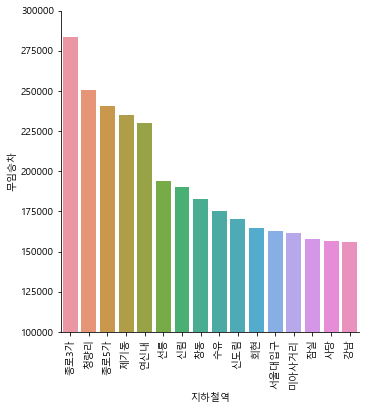

In [59]:
plt.figure(figsize=(15,12))
plt.rcParams['lines.linewidth'] = 4
pp202 = sns.catplot(x='지하철역', y='무임승차', data=pp201, kind='bar');
pp202
plt.xticks(rotation=90)
plt.ylim([100000, 300000])

In [68]:
import csv

with open('2021년_06월_유무임.csv', 'rt', encoding='UTF8') as f:
    data = csv.reader(f)
    next(data)
    mx = [0] * 4
    mx_station = [''] * 4
    label = ['유임승차', '유임하차', '무임승차', '무임하차']
    for row in data:
        for i in range(4, 8):
            row[i] = int(row[i].replace(',',''))
            if row[i] > mx[i-4]:
                mx[i-4] = row[i]
                mx_station[i-4] = row[3] + ' ' + row[1]

for i in range(4):
    print(label[i] + ' : ' + mx_station[i], mx[i])


유임승차 : 강남 2호선 2058680
유임하차 : 강남 2호선 2036873
무임승차 : 종로3가 1호선 257671
무임하차 : 제기동 1호선 252064
